
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/Banco_Santander_Logotipo.svg" width="800"></img>

<h1><center><font size="6">Santander Value Prediction Extensive EDA</font></center></h1>



# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>
    - <a href='#41'>Glimpse the data</a>  
    - <a href='#42'>Check missing data</a>  
    - <a href='#43'>Check data sparsity</a>
- <a href='#5'>Data exploration</a>
    - <a href='#51'>Features type</a>
    - <a href='#52'>Data sparsity per column type</a>
    - <a href='#521'>Constant columns</a>  
    - <a href='#53'>Target variable</a>  
    - <a href='#54'>Distribution of non-zeros per row</a>  
    - <a href='#55'>Distribution of non-zeros per column</a>  
    - <a href='#56'>Float features</a>  
    - <a href='#57'>Integer features</a>      
    - <a href='#58'>Highly correlated features</a>  
- <a href='#6'>Model</a>    
- <a href='#7'>Feedback</a>
- <a href='#8'>References</a>

# <a id="1">Introduction</a>  

Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to **determine the amount or value of the customer's transaction**. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

<a href="#0"><font size="1">Go to top</font></a>

# <a id="2">Load packages</a>

In [41]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
%matplotlib inline 

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
IS_LOCAL = True

import os

if(IS_LOCAL):
    PATH="../input/santander-value-prediction-challenge"
else:
    PATH="../input"
print(os.listdir(PATH))

['sample_submission.csv', 'test.csv', 'train.csv']


# <a id="3">Read the data</a>

In [2]:
train_df = pd.read_csv(PATH+"/train.csv")
test_df = pd.read_csv(PATH+"/test.csv")

<a href="#0"><font size="1">Go to top</font></a>

# <a id="4">Check the data</a>

In [3]:
print("Santander Value Prediction Challenge train -  rows:",train_df.shape[0]," columns:", train_df.shape[1])

Santander Value Prediction Challenge train -  rows: 4459  columns: 4993


There are **4459** data rows and **4993** columns.

In [4]:
print("Santander Value Prediction Challenge test -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

Santander Value Prediction Challenge test -  rows: 49342  columns: 4992


The schema dataset contains **49342** rows - and **4992** columns (target column missing).


There are few observations that we can already make:
* The column number exceeds the rows number for the train data.  
* The test data is containing almost 10 times more data than the train data.  



<a href="#0"><font size="1">Go to top</font></a>

## <a id="41">Glimpse the data</a>

We start by looking to the data features (first 5 rows).

In [5]:
train_df.head()

ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115  20aa07010  dc5a8f1d8  \
0          0          0          0          0        0.0        0.0   
1          0          0          0          0  2200000.0        0.0   
2          0          0          0          0        0.0        0.0   
3          0          0          0          0        0.0        0.0   
4          0          0          0          0  2000000.0        0.0   

   11d86fa6a  77c9823f2  8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  \
0        0.0          0          0          0          0        0.0   
1        0.0          0          0          0          0        0.0   
2        0.0          0          0          0          0        0.0   
3        0.0          0          0          0          0        0.0   
4        0.0          0          0          0          0        0.0   

   96f83a237  b8a716ebf  6c7a4567c  4fcfd2b4d  f3b9c0b95  71cebf11c  \
0          0        0.0          0          0        0.0          0   
1          0        0.0          0          0        0.0          0   
2          0        0.0          0          0        0.0          0   
3          0        0.0          0          0        0.0          0   
4          0        0.0          0          0        0.0          0   

   d966ac62c  68b647452  c88d108c9  ff7b471cd  d5308d8bc  0d866c3d7  \
0          0        0.0          0          0          0        0.0   
1          0        0.0          0          0          0        0.0   
2          0        0.0          0          0          0        0.0   
3          0        0.0          0          0          0        0.0   
4          0        0.0          0          0          0        0.0   

   bc3f77679  bd8f989f1  0eff5bf95  22ed6dba3  92b13ebba  c330f1a67  \
0          0        0.0          0        0.0        0.0          0   
1          0        0.0          0        0.0        0.0          0   
2          0        0.0          0        0.0        0.0          0   
3          0        0.0          0        0.0        0.0          0   
4          0        0.0          0        0.0        0.0          0   

   233c7c17c  2cb4d123e  eeac16933  87ffda550  822e49b95  316b978cd  \
0        0.0          0          0  1300000.0        0.0          0   
1        0.0          0          0        0.0        0.0          0   
2        0.0          0          0        0.0        0.0          0   
3        0.0          0          0        0.0        0.0          0   
4        0.0          0          0        0.0        0.0          0   

   d04e16aed  5d5c5ce6d  ec863cb52  11ad148bd  ea18d720e  408d86ce9  \
0        0.0          0          0        0.0        0.0        0.0   
1        0.0          0          0        0.0        0.0        0.0   
2        0.0          0          0        0.0        0.0        0.0   
3        0.0          0          0        0.0        0.0        0.0   
4        0.0          0          0        0.0        0.0        0.0   

   69d8b4020  b0868a049  80b14398e  ecdef52b2  c36bcacc5  151d318cd  \
0          0          0        0.0        0.0          0          0   
1          0          0        0.0        0.0          0          0   
2          0          0        0.0        0.0          0          0   
3          0          0        0.0        0.0          0          0   
4          0          0        0.0        0.0          0          0   

   ab0cddb90  2d6bd8275   dfdf4b580  c87722678  a8c320153  7df8788e8  \
0          0        0.0         0.0          0          0          0   
1          0     

In [6]:
test_df.head()

ID  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  \
0  000137c73        0.0        0.0        0.0        0.0        0.0   
1  00021489f        0.0        0.0        0.0        0.0        0.0   
2  0004d7953        0.0        0.0        0.0        0.0        0.0   
3  00056a333        0.0        0.0        0.0        0.0        0.0   
4  00056d8eb        0.0        0.0        0.0        0.0        0.0   

   30347e683  d08d1fbe3  6ee66e115  20aa07010  dc5a8f1d8  11d86fa6a  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   77c9823f2  8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  96f83a237  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   b8a716ebf  6c7a4567c  4fcfd2b4d  f3b9c0b95  71cebf11c  d966ac62c  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   68b647452  c88d108c9  ff7b471cd     d5308d8bc  0d866c3d7  bc3f77679  \
0        0.0        0.0        0.0  5.528249e+06        0.0        0.0   
1        0.0        0.0        0.0  0.000000e+00        0.0        0.0   
2        0.0        0.0        0.0  0.000000e+00        0.0        0.0   
3        0.0        0.0        0.0  0.000000e+00        0.0        0.0   
4        0.0        0.0        0.0  0.000000e+00        0.0        0.0   

    bd8f989f1  0eff5bf95  22ed6dba3  92b13ebba  c330f1a67  233c7c17c  \
0         0.0        0.0        0.0        0.0        0.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   
2         0.0        0.0        0.0        0.0        0.0        0.0   
3  20884000.0        0.0        0.0        0.0        0.0        0.0   
4         0.0        0.0        0.0        0.0        0.0        0.0   

    2cb4d123e  eeac16933   87ffda550  822e49b95  316b978cd  d04e16aed  \
0         0.0        0.0         0.0        0.0        0.0        0.0   
1         0.0        0.0         0.0        0.0        0.0        0.0   
2         0.0        0.0         0.0        0.0        0.0        0.0   
3  36252000.0        0.0  20000000.0        0.0        0.0        0.0   
4         0.0        0.0         0.0        0.0        0.0        0.0   

    5d5c5ce6d  ec863cb52  11ad148bd  ea18d720e  408d86ce9  69d8b4020  \
0         0.0        0.0        0.0        0.0        0.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   
2  50000000.0        0.0        0.0        0.0        0.0        0.0   
3         0.0        0.0        0.0        0.0        0.0        0.0   
4         0.0        0.0        0.0        0.0        0.0        0.0   

   b0868a049  80b14398e  ecdef52b2     c36bcacc5  151d318cd  ab0cddb90  \
0        0.0        0.0        0.0  8.175880e+06        0.0        0.0   
1        0.0        0.0        0.0  0.000000e+00        0.0        0.0   
2        0.0        0.0        0.0  0.000000e+00        0.0        0.0   
3        0.0        0.0        0.0  0.000000e+00        0.0        0.0   
4        0.0        0.0        0.0  0.000000e+00        0.0        0.0   

   2d6bd8275  dfdf4b580  c87722678  a8c320153  7df8788e8  a04684f1f  \
0        0.0        0.0        0.0  

The columns in the train data are as following: 

* **ID**: we will have to check if the ID is in anyway connected with the column names; these are hexa numbers with 9 digits.
* **target**: this is the *target* variable and has numeric (real) values;  
* 4991 columns with names anonymized - there are hexa large numbers with 9 digits.  Most of the columns have 0 values, the dataset is sparse. The columns types seems to be integers and reals.


Test data has the same columns, without **target**.


## <a id="42">Check missing data</a>  

Let's check the missing data for train set.

In [7]:
def check_nulls(df):
    nulls = df.isnull().sum(axis=0).reset_index()
    nulls.columns = ['column', 'missing']
    nulls = nulls[nulls['missing']>0]
    nulls = nulls.sort_values(by='missing')
    return nulls    


check_nulls(train_df)

,column,missing


There are no missing data in the train set.  

Let's check the missing data for test set.

In [8]:
check_nulls(test_df)

,column,missing


There are no missing data in the test set either.



## <a id="43">Check data sparsity</a>  

Let's check the data sparsity for train set.

In [9]:
def check_sparsity(df):
    non_zeros = (df.ne(0).sum(axis=1)).sum()
    total = df.shape[1]*df.shape[0]
    zeros = total - non_zeros
    sparsity = round(zeros / total * 100,2)
    density = round(non_zeros / total * 100,2)

    print(" Total:",total,"\n Zeros:", zeros, "\n Sparsity [%]: ", sparsity, "\n Density [%]: ", density)
    return density

d1 = check_sparsity(train_df)

 Total: 22263787 
 Zeros: 21554760 
 Sparsity [%]:  96.82 
 Density [%]:  3.18


Let's check the data sparsity for test set.

In [10]:
d2 = check_sparsity(test_df)

 Total: 246315264 
 Zeros: 242805367 
 Sparsity [%]:  98.58 
 Density [%]:  1.42


One important observation is that the data sparsity is slightly larger for the test set than for the train set (density is more than double for the train set). We will look into more details about the data distribution in the following section.


<a href="#0"><font size="1">Go to top</font></a>

# <a id="5">Data exploration</a>

##  <a id="51">Features type</a>


Let's check the features type in the data.

In [11]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


There are 3147 integer features, 1845 float values and one non-numeric value (the ID field).  

Let's save the **metadata** for the columns. For each feature we set the metadata for **role**, if we will use the feature - **keep** and the **dtype**. 

In [12]:
data = []
for feature in train_df.columns:
    # Defining the role
    if feature == 'target':
        use = 'target'
    elif feature == 'ID':
        use = 'id'
    else:
        use = 'input'
         
        
    # Initialize keep to True for all variables except for `ID`
    keep = True
    if feature == 'ID':
        keep = False
    
    # Defining the data type 
    dtype = train_df[feature].dtype
    
    
    
    # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'keep': keep,
        'dtype': dtype,
    }
    data.append(feature_dictionary)
    
# Create the metadata
metadata = pd.DataFrame(data, columns=['varname', 'use', 'keep', 'dtype'])
metadata.set_index('varname', inplace=True)

# Sample the metadata
metadata.head(10)

,use,keep,dtype
varname,,,
ID,id,False,object
target,target,True,float64
48df886f9,input,True,float64
0deb4b6a8,input,True,int64
34b15f335,input,True,float64
a8cb14b00,input,True,int64
2f0771a37,input,True,int64
30347e683,input,True,int64
d08d1fbe3,input,True,int64


Let's check that we have the expected distribution of the dtype in the metadata (as identified before).

In [13]:
pd.DataFrame({'count' : metadata.groupby(['dtype'])['dtype'].size()}).reset_index()

,dtype,count
0,int64,3147
1,float64,1845
2,object,1


<a href="#0"><font size="1">Go to top</font></a>  


## <a id="52">Data sparsity per column type</a>


### Integer type

For train data:

In [14]:
int_data = []
var = metadata[(metadata.dtype == 'int64') & (metadata.use == 'input')].index
d3 = check_sparsity(train_df[var])

 Total: 14032473 
 Zeros: 13872420 
 Sparsity [%]:  98.86 
 Density [%]:  1.14


For test data:

In [15]:
d4 = check_sparsity(test_df[var])

 Total: 155279274 
 Zeros: 153996280 
 Sparsity [%]:  99.17 
 Density [%]:  0.83


### Float type

For train data:

In [16]:
var = metadata[(metadata.dtype == 'float64') & (metadata.use == 'input')].index
d5 = check_sparsity(train_df[var])

 Total: 8222396 
 Zeros: 7682340 
 Sparsity [%]:  93.43 
 Density [%]:  6.57


For test data:

In [17]:
d6 = check_sparsity(test_df[var])

 Total: 90986648 
 Zeros: 88809087 
 Sparsity [%]:  97.61 
 Density [%]:  2.39


Let's put together all these data and compare them. For convenience, we will compare the densities.

In [18]:
data = {'Dataset': ['Train', 'Test'], 'All': [d1, d2], 'Integer': [d3,d4], 'Float': [d5,d6]}
    
density_data = pd.DataFrame(data)
density_data.set_index('Dataset', inplace=True)
density_data

,All,Float,Integer
Dataset,,,
Train,3.18,6.57,1.14
Test,1.42,2.39,0.83


The data density for train set is 2.23 times larger than for the test set.   

As well, the train float data density is 5.7 times larger than the train integer data density.  
The test float data density is 2.87 time larger than test integer data density.  

In general density is larger in train set than in test set and in float data than in integer data.

<a href="#0"><font size="1">Go to top</font></a>  


##  <a id="521">Constant columns</a>

Let's check if there are constant columns.

In [19]:
# check constant columns
colsConstant = []
columnsList = [x for x in train_df.columns if not x in ['ID','target']]

for col in columnsList:
    if train_df[col].std() == 0: 
        colsConstant.append(col)
print("There are", len(colsConstant), "constant columns in the train set.")

There are 256 constant columns in the train set.


Let's mark all these columns to drop.

In [34]:
metadata['keep'].loc[colsConstant] = False

<a href="#0"><font size="1">Go to top</font></a>  


##  <a id="53">Target variable</a>


Let's check the target variable distribution.

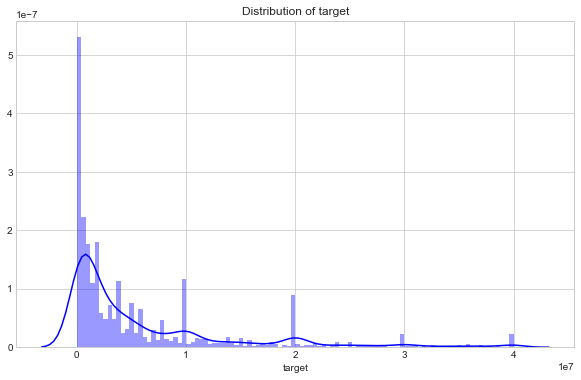

In [33]:
# Plot distribution of one feature
def plot_distribution(df,feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(df[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   
    
plot_distribution(train_df, "target", "blue")

Let's check the distribution of log(target).

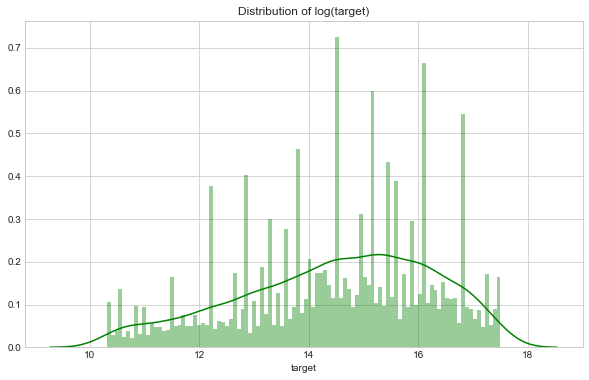

In [34]:
def plot_log_distribution(df,feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(np.log1p(df[feature]).dropna(),color=color, kde=True,bins=100)
    plt.title("Distribution of log(target)")
    plt.show()   

plot_log_distribution(train_df, "target", "green")  

<a href="#0"><font size="1">Go to top</font></a>  


##  <a id="54">Distribution of non-zero features values per row</a>

Let's check what is the distribution of non-zero features values per row in the train set.

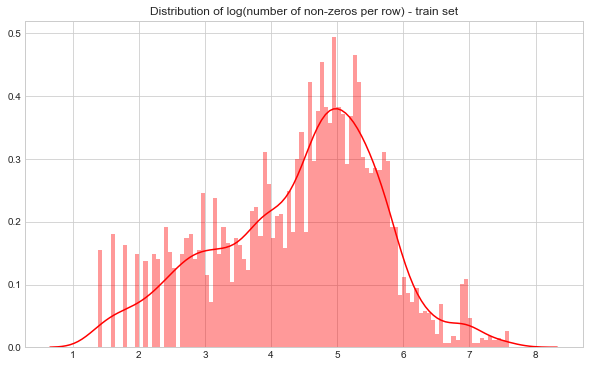

In [35]:
non_zeros = (train_df.ne(0).sum(axis=1))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per row) - train set")
sns.distplot(np.log1p(non_zeros),color="red", kde=True,bins=100)
plt.show()


Let's check distribution of non-zero features values per row in the test set.

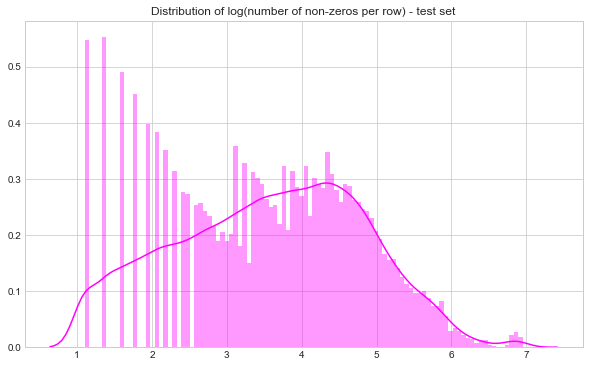

In [36]:
non_zeros = (test_df.ne(0).sum(axis=1))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per row) - test set")
sns.distplot(np.log1p(non_zeros),color="magenta", kde=True,bins=100)
plt.show()

Let's separate only the **real** values, excepting the **target**. And let's represent the distribution of non-zero features values only for these.

### Distribution of non-zeros for float type features

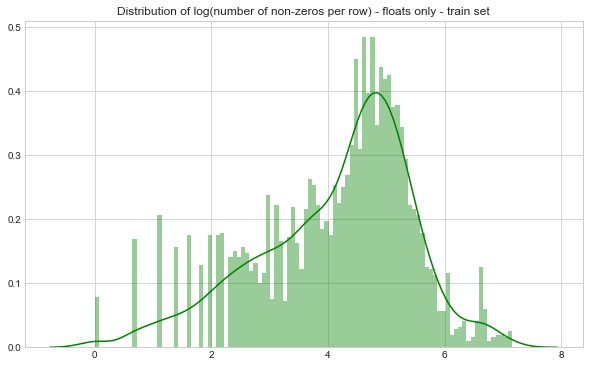

In [37]:
var = metadata[(metadata.dtype == 'float64') & (metadata.use == 'input')].index
non_zeros = (train_df[var].ne(0).sum(axis=1))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per row) - floats only - train set")
sns.distplot(np.log1p(non_zeros),color="green", kde=True,bins=100)
plt.show()

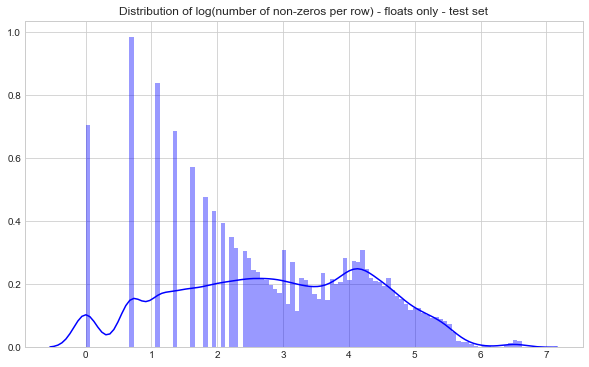

In [38]:
non_zeros = (test_df[var].ne(0).sum(axis=1))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per row) - floats only - test set")
sns.distplot(np.log1p(non_zeros),color="blue", kde=True,bins=100)
plt.show()

### Distribution of non-zeros for integer type features

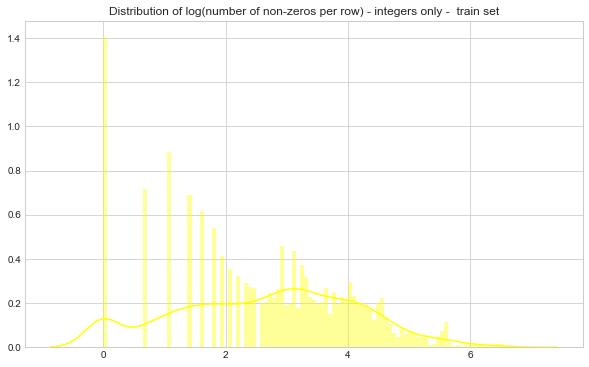

In [39]:
var = metadata[(metadata.dtype == 'int64') & (metadata.use == 'input')].index
non_zeros = (train_df[var].ne(0).sum(axis=1))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per row) - integers only -  train set")
sns.distplot(np.log1p(non_zeros),color="yellow", kde=True,bins=100)
plt.show()

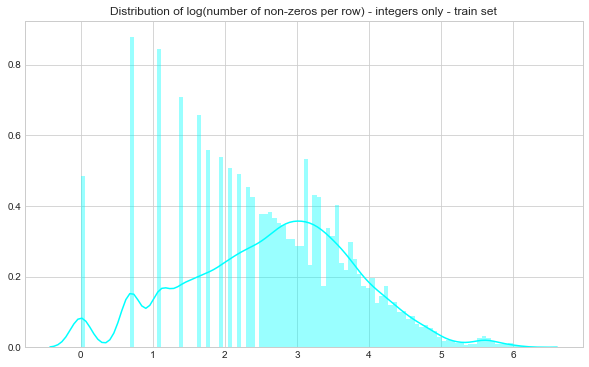

In [40]:
non_zeros = (test_df[var].ne(0).sum(axis=1))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per row) - integers only - train set")
sns.distplot(np.log1p(non_zeros),color="cyan", kde=True,bins=100)
plt.show()

<a href="#0"><font size="1">Go to top</font></a>


##  <a id="55">Distribution of non-zero features values per column</a>

Let's check what is the distribition of non-zero features values per column in the train set.

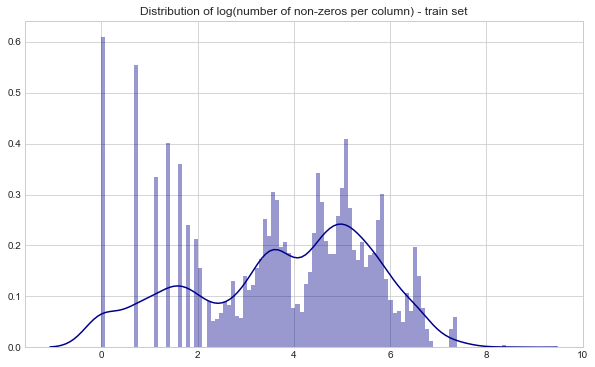

In [41]:
non_zeros = (train_df.ne(0).sum(axis=0))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per column) - train set")
sns.distplot(np.log1p(non_zeros),color="darkblue", kde=True,bins=100)
plt.show()

Let's check distribution of non-zero features values per row in the test set.

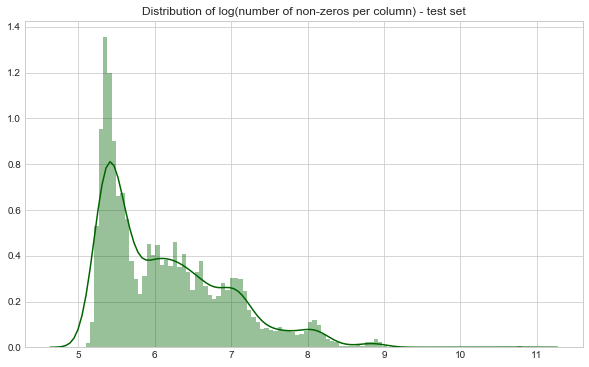

In [42]:
non_zeros = (test_df.ne(0).sum(axis=0))

plt.figure(figsize=(10,6))
plt.title("Distribution of log(number of non-zeros per column) - test set")
sns.distplot(np.log1p(non_zeros),color="darkgreen", kde=True,bins=100)
plt.show()

<a href="#0"><font size="1">Go to top</font></a>  


##  <a id="56">Float features</a>

Let's see now  the distribution of the sum of float features values per column.

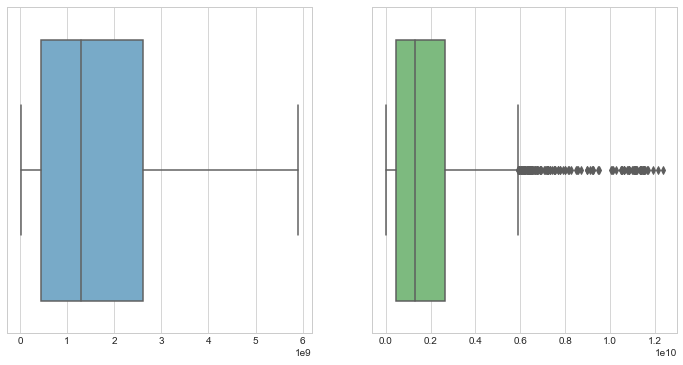

In [43]:
var = metadata[(metadata.dtype == 'float64') & (metadata.use == 'input')].index
val = train_df[var].sum()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(val, palette="Blues",  showfliers=False,ax=ax1)
sns.boxplot(val, palette="Greens",  showfliers=True,ax=ax2)
plt.show();

<a href="#0"><font size="1">Go to top</font></a>  


##  <a id="57">Integer features</a>

Let's see now  the distribution of the sum of integer features values per column.

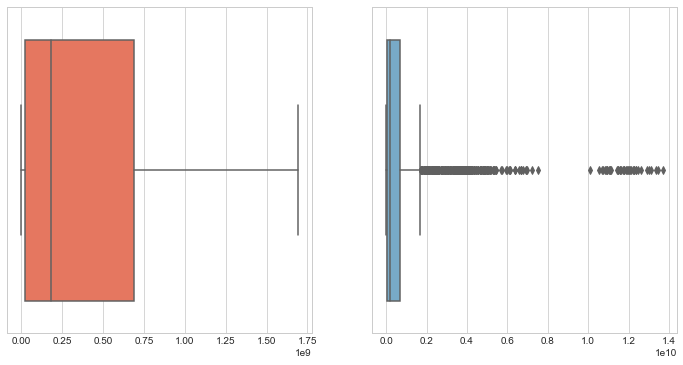

In [44]:
var = metadata[(metadata.dtype == 'int64') & (metadata.use == 'input')].index
val = train_df[var].sum()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(val, palette="Reds",  showfliers=False,ax=ax1)
sns.boxplot(val, palette="Blues",  showfliers=True,ax=ax2)
plt.show();

<a href="#0"><font size="1">Go to top</font></a>  


##  <a id="58">Highly correlated features</a>


We use a code snapshot from <a href="#7">[1]</a> to extract the features that are highly correlated with **target** feature. We select only the features correlated or inverse correlated with **target** and having a corrlelation coefficient 


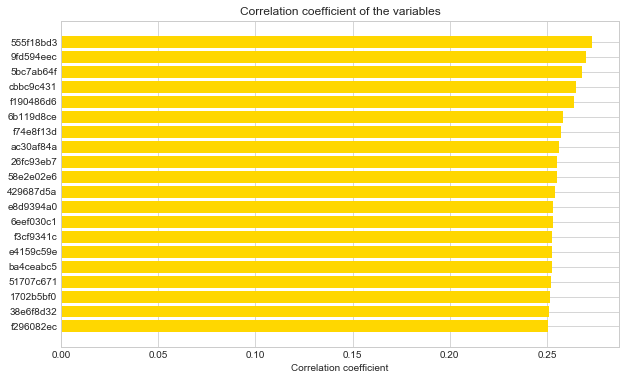

In [45]:
labels = []
values = []
for col in train_df.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(np.corrcoef(train_df[col].values, train_df["target"].values)[0,1])
corr_df = pd.DataFrame({'columns_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 
corr_df = corr_df[(corr_df['corr_values']>0.25) | (corr_df['corr_values']<-0.25)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,6))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='gold')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.columns_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

Let's represent the correlation map between these selected features.

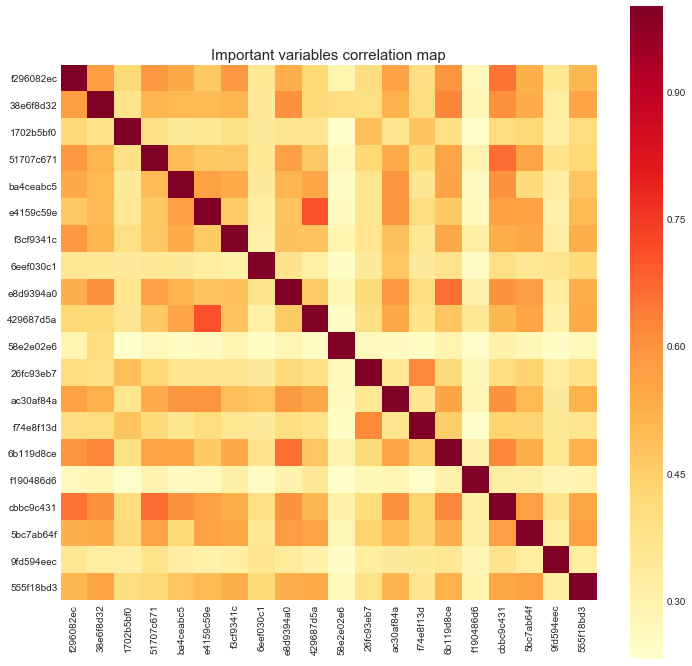

In [46]:
temp_df = train_df[corr_df.columns_labels.tolist()]
corrmat = temp_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlOrRd")
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Let's represent, for the highly correlated features, the distribution in the train and test set.

In [47]:
corrmat

,f296082ec,38e6f8d32,1702b5bf0,51707c671,ba4ceabc5,e4159c59e,f3cf9341c,6eef030c1,e8d9394a0,429687d5a,58e2e02e6,26fc93eb7,ac30af84a,f74e8f13d,6b119d8ce,f190486d6,cbbc9c431,5bc7ab64f,9fd594eec,555f18bd3
f296082ec,1.000000,0.573475,0.421030,0.583141,0.542940,0.464480,0.584965,0.359692,0.528841,0.423804,0.293440,0.402008,0.561410,0.399469,0.594917,0.273552,0.653786,0.525093,0.358053,0.507721
38e6f8d32,0.573475,1.000000,0.375803,0.511429,0.503894,0.500862,0.510129,0.348474,0.604667,0.419764,0.399717,0.391739,0.520575,0.403281,0.627371,0.285092,0.605110,0.537516,0.324935,0.551517
1702b5bf0,0.421030,0.375803,1.000000,0.384846,0.343283,0.359051,0.390824,0.342077,0.367189,0.363938,0.232914,0.491786,0.365424,0.476714,0.389179,0.235972,0.405304,0.422239,0.321058,0.404814
51707c671,0.583141,0.511429,0.384846,1.000000,0.497604,0.466246,0.465663,0.354603,0.569176,0.465665,0.273409,0.424837,0.534984,0.409511,0.552250,0.295548,0.665866,0.557732,0.374498,0.423826
ba4ceabc5,0.542940,0.503894,0.343283,0.497604,1.000000,0.563546,0.536101,0.341905,0.511722,0.551183,0.255346,0.367143,0.594267,0.361003,0.557855,0.257239,0.599854,0.413587,0.321755,0.471922
e4159c59e,0.464480,0.500862,0.359051,0.466246,0.563546,1.000000,0.459791,0.326940,0.479837,0.710533,0.256330,0.366804,0.596746,0.406337,0.459595,0.266718,0.561849,0.559677,0.308636,0.501484
f3cf9341c,0.584965,0.510129,0.390824,0.465663,0.536101,0.459791,1.000000,0.314943,0.483347,0.476179,0.293489,0.367498,0.491465,0.356531,0.541531,0.319410,0.530562,0.545356,0.323729,0.526672
6eef030c1,0.359692,0.348474,0.342077,0.354603,0.341905,0.326940,0.314943,1.000000,0.370842,0.313849,0.251386,0.341412,0.472912,0.341816,0.372025,0.253663,0.391765,0.359228,0.369443,0.411148
e8d9394a0,0.528841,0.604667,0.367189,0.569176,0.511722,0.479837,0.483347,0.370842,1.000000,0.461055,0.283404,0.415886,0.584694,0.402210,0.661236,0.302210,0.599669,0.575533,0.338520,0.525770
429687d5a,0.423804,0.419764,0.363938,0.465665,0.551183,0.710533,0.476179,0.313849,0.461055,1.000000,0.245511,0.392714,0.541727,0.375524,0.469731,0.349440,0.504754,0.554377,0.306718,0.539220


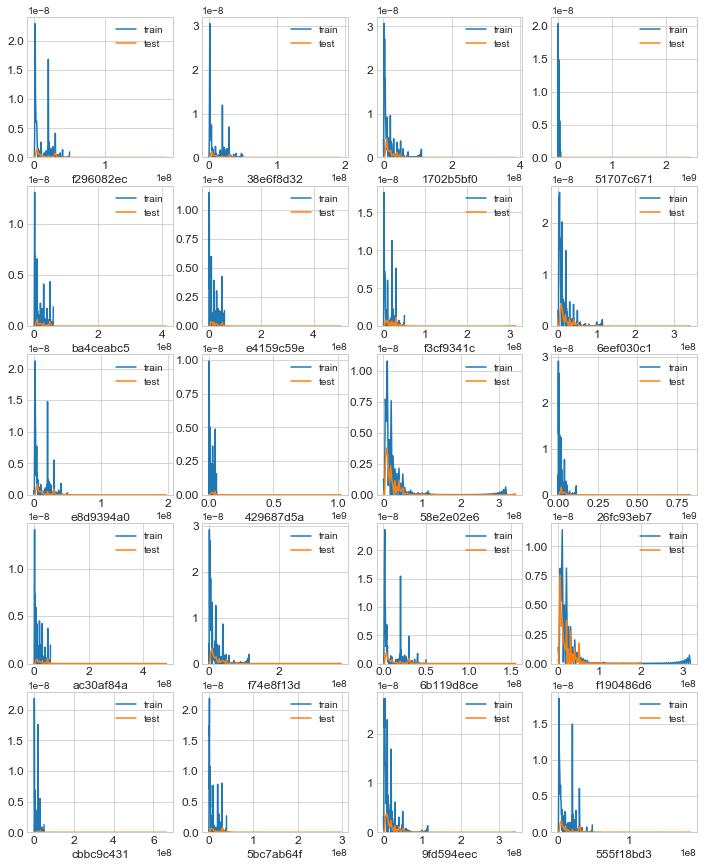

In [34]:
var = temp_df.columns.values

i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,4,figsize=(12,15))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(train_df[feature], bw=0.5,label="train")
    sns.kdeplot(test_df[feature], bw=0.5,label="test")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Let's represent the relationship between two of the highest correlated features ('429687d5a';'e4159c59e') and ('6b119d8ce';'e8d9394a0').

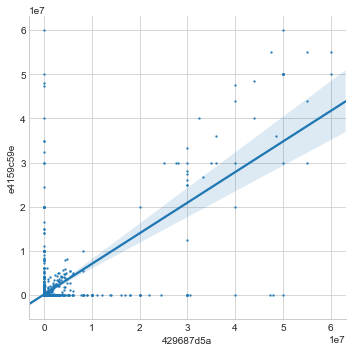

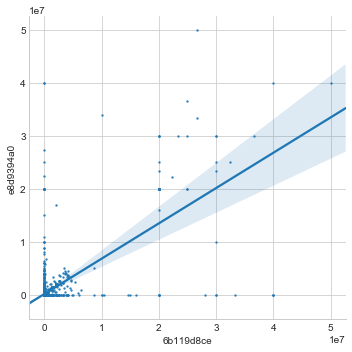

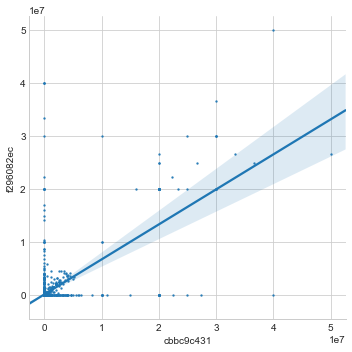

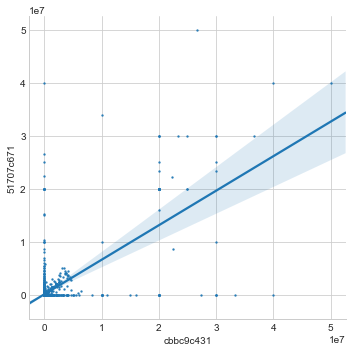

In [48]:
sns.set_style('whitegrid')
plt.figure()
s = sns.lmplot(x='429687d5a', y='e4159c59e',data=train_df, fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='6b119d8ce', y='e8d9394a0',data=train_df, fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='cbbc9c431', y='f296082ec',data=train_df, fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='cbbc9c431', y='51707c671',data=train_df, fit_reg=True,scatter_kws={'s':2})
plt.show()



<a href="#0"><font size="1">Go to top</font></a>

# <a id="6">Model</a>  

Let's create now a model. We start by droping the duplicate columns.



In [39]:
var = metadata[(metadata.keep == False) & (metadata.use == 'input')].index
train_df.drop(var, axis=1, inplace=True)  
test_df.drop(var, axis=1, inplace=True)  

Let's check the shape of train and test set after droping the columns.

In [40]:
print("Santander Value Prediction Challenge train -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Santander Value Prediction Challenge test -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

Santander Value Prediction Challenge train -  rows: 4459  columns: 4737
Santander Value Prediction Challenge test -  rows: 49342  columns: 4736


Let's add some statistics.

Prepare the model.  
We create the split with 5 folds. We include only the selected input features to keep. We replace 0 values with NAs (to use the special capability of lgb to deal with missing values (and also the compact storage when creating the dataset).

In [43]:
# Create folds
folds = KFold(n_splits=5, shuffle=True, random_state=1)

features = metadata[(metadata.keep == True) & (metadata.use == 'input')].index

# Replace 0 with NAs
train_df.replace(0, np.nan, inplace=True)
test_df.replace(0, np.nan, inplace=True)


# Convert to lightgbm Dataset
dtrain = lgb.Dataset(data=train_df[features], label=np.log1p(train_df['target']), free_raw_data=False)
# Construct dataset so that we can use slice()
dtrain.construct()
# Init predictions
sub_preds = np.zeros(test_df.shape[0])
oof_preds = np.zeros(train_df.shape[0])

Let's add the lgb parameters.

In [57]:
lgb_params = {
    'objective': 'regression',
    'num_leaves': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.75,
    'verbose': -1,
    'seed': 2018,
    'boosting_type': 'gbdt',
    'max_depth': 10,
    'learning_rate': 0.04,
    'metric': 'l2',
}

Train and fit the lgb model with 5 folds. Then calculate the Full Out-Of-Fold score according to <a href="#8">[3]</font></a>.

In [58]:
# Run KFold
for trn_idx, val_idx in folds.split(train_df):
    # Train lightgbm
    clf = lgb.train(
        params=lgb_params,
        train_set=dtrain.subset(trn_idx),
        valid_sets=dtrain.subset(val_idx),
        num_boost_round=10000, 
        early_stopping_rounds=100,
        verbose_eval=50
    )
    # Predict Out Of Fold and Test targets
    # Using lgb.train, predict will automatically select the best round for prediction
    oof_preds[val_idx] = clf.predict(dtrain.data.iloc[val_idx])
    sub_preds += clf.predict(test_df[features]) / folds.n_splits
    # Display current fold score
    print('Current fold score : %9.6f' % mean_squared_error(np.log1p(train_df['target'].iloc[val_idx]), 
                             oof_preds[val_idx]) ** .5)
    
# Display Full OOF score (square root of a sum is not the sum of square roots)
print('Full Out-Of-Fold score : %9.6f' 
      % (mean_squared_error(np.log1p(train_df['target']), oof_preds) ** .5))

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 2.02479
[100]	valid_0's l2: 1.96298
[150]	valid_0's l2: 1.9473
[200]	valid_0's l2: 1.95409
[250]	valid_0's l2: 1.95277
Early stopping, best iteration is:
[157]	valid_0's l2: 1.94612
1.39503472734
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 2.34223
[100]	valid_0's l2: 2.27707
[150]	valid_0's l2: 2.28415
[200]	valid_0's l2: 2.29525
Early stopping, best iteration is:
[107]	valid_0's l2: 2.27666
1.508860268
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 2.22218
[100]	valid_0's l2: 2.13363
[150]	valid_0's l2: 2.11851
[200]	valid_0's l2: 2.11333
[250]	valid_0's l2: 2.11273
[300]	valid_0's l2: 2.11601
Early stopping, best iteration is:
[231]	valid_0's l2: 2.11079
1.4528544351
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 2.14508
[100]	valid_0's l2: 2.05556
[150]	valid_0's l2: 2.03228
[200]	valid_0's l2: 2

Let's plot feature importance. We select the first 50 features.

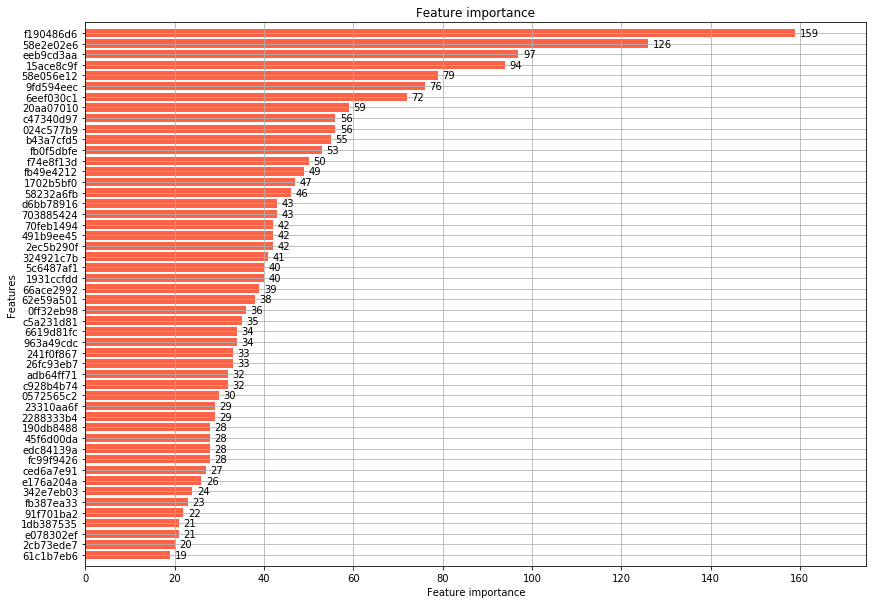

In [64]:
fig, ax = plt.subplots(figsize=(14,10))
lgb.plot_importance(clf, max_num_features=50, height=0.8,color="tomato",ax=ax)
plt.show()

<a href="#0"><font size="1">Go to top</font></a>


# <a id="7">Feedback</a>  

This Kernel is still under development. I would very much appreciate your feedback.


<a href="#0"><font size="1">Go to top</font></a>

# <a id="8">References</a>  

[1] <a href="https://www.kaggle.com/sudalairajkumar">SRK</a>, <a href="https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-santander-value">Simple Exploration Notebook - Santander Value</a>  
[2] <a href="https://www.kaggle.com/samratp">Samrat Pandiri</a>, <a href="https://www.kaggle.com/samratp/aggregates-sumvalues-sumzeros-k-means-pca">Aggregates + SumValues + SumZeros + K-Means + PCA</a>  
[3] <a href="https://www.kaggle.com/ogrellier">olivier</a>, <a href="https://www.kaggle.com/ogrellier/santander-46-features">Santander_46_features</a>